Let's try to experiment with Pythia-12B and TransformerLens

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import random
import yaml
from omegaconf import DictConfig, OmegaConf
from interventions import three_operands
from tqdm.notebook import tqdm
import numpy as np
from functools import partial

import transformer_lens.utils as utils
from transformer_lens import ActivationCache, HookedTransformer
import transformer_lens.patching as patching
import seaborn as sns
import matplotlib.pyplot as plt

seed = 0

In [2]:
random.seed(seed)
torch.manual_seed(seed)
torch.set_grad_enabled(False)

In [3]:
model_name = 'EleutherAI/pythia-12b-deduped-v0'
model_name_lens = 'pythia-12b-deduped-v0'
# model_name = 'EleutherAI/pythia-6.9b-deduped-v0'
# model_name_lens = 'pythia-6.9b-deduped-v0'
# model_name_lens = 'facebook/opt-125m'
tokenizer = AutoTokenizer.from_pretrained(model_name)

# model = AutoModelForCausalLM.from_pretrained(
#     model_name,
#     load_in_8bit=True,
#     torch_dtype=torch.float16,
#     cache_dir=None,
#     device_map="auto"
# )

# conf = OmegaConf.load('conf/config.yaml')
# intervention_list = three_operands.get_arithmetic_data_three_operands(tokenizer, conf)

In [4]:
model = HookedTransformer.from_pretrained(
    model_name_lens,
    dtype=torch.bfloat16
)
model.eval();

# These parameters might be useful in the future
# center_unembed=True,
# center_writing_weights=True,
# fold_ln=True,

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Loaded pretrained model pythia-12b-deduped-v0 into HookedTransformer


In [5]:
example_prompt = "After John and Mary went to the store, John gave a bottle of milk to"
example_answer = " Mary"
utils.test_prompt(example_prompt, example_answer, model, prepend_bos=True)

Tokenized prompt: ['<|endoftext|>', 'After', ' John', ' and', ' Mary', ' went', ' to', ' the', ' store', ',', ' John', ' gave', ' a', ' bottle', ' of', ' milk', ' to']
Tokenized answer: [' Mary']


Performance on answer token:
Rank: 0        Logit: 16.62 Prob: 30.47% Token: | Mary|

Top 0th token. Logit: 16.62 Prob: 30.47% Token: | Mary|
Top 1th token. Logit: 16.12 Prob: 18.46% Token: | the|
Top 2th token. Logit: 15.94 Prob: 15.23% Token: | his|
Top 3th token. Logit: 15.44 Prob:  9.28% Token: | a|
Top 4th token. Logit: 13.94 Prob:  2.06% Token: | their|
Top 5th token. Logit: 12.88 Prob:  0.71% Token: | each|
Top 6th token. Logit: 12.69 Prob:  0.59% Token: | Sarah|
Top 7th token. Logit: 12.50 Prob:  0.49% Token: | Sam|
Top 8th token. Logit: 12.50 Prob:  0.49% Token: | baby|
Top 9th token. Logit: 12.44 Prob:  0.46% Token: |
|


Ranks of the answer tokens: [(' Mary', 0)]

In [6]:
conf = OmegaConf.load('conf/config.yaml')
intervention_list = three_operands.get_arithmetic_data_three_operands(tokenizer, conf)

 45%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                   | 95/210 [00:00<00:00, 949.13it/s]

res base: 14
res base wo whitespace: 4
res base with prefix: a 14
res base tok: ['a', 'Ġ14']
operands_base:  ('3', '5', '6')
x_base_tok:  ['Ġ3']
y_base_tok:  ['Ġ5']
z_base_tok:  ['Ġ6']
base string tok list:  [21, 559, 577, 559, 721, 426, 1638, 15, 495, 559, 608, 559, 721, 426]
z_base_tok:  721
y_base_tok:  608
x_base_tok:  495
res base: 17
res base wo whitespace: 7
res base with prefix: a 17
res base tok: ['a', 'Ġ17']
operands_base:  ('3', '7', '7')
x_base_tok:  ['Ġ3']
y_base_tok:  ['Ġ7']
z_base_tok:  ['Ġ7']
base string tok list:  [20, 559, 374, 559, 854, 426, 2145, 15, 495, 559, 818, 559, 818, 426]
z_base_tok:  818
y_base_tok:  818
x_base_tok:  495
res base: 12
res base wo whitespace: 2
res base with prefix: a 12
res base tok: ['a', 'Ġ12']
operands_base:  ('8', '2', '2')
x_base_tok:  ['Ġ8']
y_base_tok:  ['Ġ2']
z_base_tok:  ['Ġ2']
base string tok list:  [21, 559, 374, 559, 854, 426, 1638, 15, 854, 559, 374, 559, 374, 426]
z_base_tok:  374
y_base_tok:  374
x_base_tok:  854
res base: 14


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 240.96it/s]

res base: 16
res base wo whitespace: 6
res base with prefix: a 16
res base tok: ['a', 'Ġ16']
operands_base:  ('2', '2', '4')
x_base_tok:  ['Ġ2']
y_base_tok:  ['Ġ2']
z_base_tok:  ['Ġ4']
base string tok list:  [19, 475, 495, 475, 495, 426, 1283, 15, 374, 475, 374, 475, 577, 426]
z_base_tok:  577
y_base_tok:  374
x_base_tok:  374
res base: 18
res base wo whitespace: 8
res base with prefix: a 18
res base tok: ['a', 'Ġ18']
operands_base:  ('2', '3', '3')
x_base_tok:  ['Ġ2']
y_base_tok:  ['Ġ3']
z_base_tok:  ['Ġ3']
base string tok list:  [19, 475, 374, 475, 495, 426, 1249, 15, 374, 475, 495, 475, 495, 426]
z_base_tok:  495
y_base_tok:  495
x_base_tok:  374
res base: 12
res base wo whitespace: 2
res base with prefix: a 12
res base tok: ['a', 'Ġ12']
operands_base:  ('2', '2', '3')
x_base_tok:  ['Ġ2']
y_base_tok:  ['Ġ2']
z_base_tok:  ['Ġ3']
base string tok list:  [21, 475, 374, 475, 374, 426, 1668, 15, 374, 475, 374, 475, 495, 426]
z_base_tok:  495
y_base_tok:  374
x_base_tok:  374
res base: 12


In [7]:
example_prompt = intervention_list[0].few_shots + intervention_list[0].base_string
example_answer = ' 11'
utils.test_prompt(example_prompt, example_answer, model, prepend_bos=False)

Tokenized prompt: ['4', ' +', ' 4', ' +', ' 6', ' =', ' 14', '.', ' 3', ' +', ' 5', ' +', ' 6', ' =']
Tokenized answer: [' 11']


Performance on answer token:
Rank: 18       Logit: 12.50 Prob:  0.74% Token: | 11|

Top 0th token. Logit: 16.25 Prob: 31.45% Token: | 14|
Top 1th token. Logit: 15.38 Prob: 13.09% Token: | 16|
Top 2th token. Logit: 14.88 Prob:  7.96% Token: | 18|
Top 3th token. Logit: 14.31 Prob:  4.54% Token: | 4|
Top 4th token. Logit: 14.31 Prob:  4.54% Token: | 19|
Top 5th token. Logit: 14.31 Prob:  4.54% Token: | 20|
Top 6th token. Logit: 14.06 Prob:  3.54% Token: | 15|
Top 7th token. Logit: 14.06 Prob:  3.54% Token: | 17|
Top 8th token. Logit: 14.06 Prob:  3.54% Token: | 13|
Top 9th token. Logit: 13.81 Prob:  2.75% Token: | 3|


Ranks of the answer tokens: [(' 11', 18)]

In [8]:
prompt = 'Perform the arithmetic calculations based on the sequence of numbers and operators provided. '
prompt_tokenized = tokenizer(prompt, add_special_tokens=False, return_tensors='pt')['input_ids']
tokenizer.decode(prompt_tokenized[0])

'Perform the arithmetic calculations based on the sequence of numbers and operators provided. '

Let's filter only those instances which are correct on the prompt with ICD and incorrect with a prompt without

In [9]:
len(intervention_list)

210

In [10]:
corr_intervention_list = []
for item in intervention_list:
    input_id_base = item.base_string_tok.to(model.cfg.device)
    input_id_alt = item.alt_string_tok.to(model.cfg.device)
    
    # print(tokenizer.decode(input_id_base[0].tolist()))
    # print(tokenizer.decode(input_id_alt[0].tolist()))
    
    input_id_base = torch.cat((prompt_tokenized.to(model.cfg.device), input_id_base), dim=1)
    input_id_alt = torch.cat((prompt_tokenized.to(model.cfg.device), input_id_alt), dim=1)

    output_base = model.generate(input_id_base, max_new_tokens=1, do_sample=False)[0, -1].cpu().numpy()
    output_alt = model.generate(input_id_alt, max_new_tokens=1, do_sample=False)[0, -1].cpu().numpy()
    corr_tok = item.res_base_tok[0]

    item.set_predicted_alt_result(pred_alt_string=tokenizer.decode([output_alt]), pred_res_alt_tok=output_alt)
    if output_base == corr_tok and output_alt != corr_tok:
        corr_intervention_list.append(item)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
len(corr_intervention_list)

61

In [12]:
for item in corr_intervention_list:
    print(tokenizer.decode(item.base_string_tok[0].tolist()))
    print(tokenizer.decode(item.alt_string_tok[0].tolist()))

4 + 2 + 8 = 14. 8 + 2 + 2 =
       <|endoftext|> 8 + 2 + 2 =
5 + 4 + 2 = 11. 8 + 6 + 5 =
       <|endoftext|> 8 + 6 + 5 =
9 + 2 + 2 = 13. 6 + 2 + 3 =
       <|endoftext|> 6 + 2 + 3 =
4 + 6 + 8 = 18. 2 + 9 + 6 =
       <|endoftext|> 2 + 9 + 6 =
3 + 3 + 7 = 13. 4 + 9 + 5 =
       <|endoftext|> 4 + 9 + 5 =
9 + 2 + 7 = 18. 2 + 10 + 3 =
       <|endoftext|> 2 + 10 + 3 =
6 + 2 + 5 = 13. 11 + 3 + 2 =
       <|endoftext|> 11 + 3 + 2 =
5 + 7 + 6 = 18. 11 + 2 + 6 =
       <|endoftext|> 11 + 2 + 6 =
5 + 12 + 2 = 19. 4 + 6 + 6 =
       <|endoftext|> 4 + 6 + 6 =
4 + 4 + 4 = 12. 8 + 7 + 4 =
       <|endoftext|> 8 + 7 + 4 =
2 + 5 + 12 = 19. 5 + 7 + 3 =
       <|endoftext|> 5 + 7 + 3 =
7 + 5 + 5 = 17. 11 + 3 + 2 =
       <|endoftext|> 11 + 3 + 2 =
4 + 5 + 8 = 17. 6 + 7 + 5 =
       <|endoftext|> 6 + 7 + 5 =
10 + 2 + 2 = 14. 4 + 10 + 2 =
       <|endoftext|> 4 + 10 + 2 =
The result of 3 + 4 + 6 = 13. The result of 8 + 3 + 8 =
          <|endoftext|> The result of 8 + 3 + 8 =
The result of 2 + 13 + 3 = 

In [13]:
# torch.save(corr_intervention_list, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/my_perturbations_data_pythia_12b/base_data_arabic_pythia_12b.pkl')

In [14]:
corr_intervention_list = torch.load('./data/my_perturbations_data_pythia_12b/base_data_arabic_pythia_12b.pkl', weights_only=False)

In [17]:
for i, item in enumerate(corr_intervention_list):
    print(i)
    print(tokenizer.decode(item.base_string_tok[0].tolist()))
    print(tokenizer.decode(item.alt_string_tok[0].tolist()))

0
6 + 2 + 3 = 11. 4 + 6 + 8 =
       <|endoftext|> 4 + 6 + 8 =
1
2 + 9 + 3 = 14. 9 + 2 + 7 =
       <|endoftext|> 9 + 2 + 7 =
2
2 + 10 + 3 = 15. 7 + 2 + 6 =
       <|endoftext|> 7 + 2 + 6 =
3
2 + 4 + 8 = 14. 12 + 2 + 4 =
       <|endoftext|> 12 + 2 + 4 =
4
5 + 5 + 2 = 12. 3 + 2 + 14 =
       <|endoftext|> 3 + 2 + 14 =
5
8 + 7 + 4 = 19. 8 + 3 + 8 =
       <|endoftext|> 8 + 3 + 8 =
6
6 + 2 + 4 = 12. 2 + 5 + 12 =
       <|endoftext|> 2 + 5 + 12 =
7
8 + 4 + 3 = 15. 7 + 5 + 3 =
       <|endoftext|> 7 + 5 + 3 =
8
2 + 7 + 6 = 15. 7 + 4 + 4 =
       <|endoftext|> 7 + 4 + 4 =
9
The result of 8 + 3 + 8 = 19. The result of 5 + 12 + 2 =
          <|endoftext|> The result of 5 + 12 + 2 =
10
The result of 2 + 7 + 2 = 11. The result of 5 + 6 + 3 =
          <|endoftext|> The result of 5 + 6 + 3 =
11
The result of 6 + 10 + 2 = 18. The result of 7 + 3 + 5 =
          <|endoftext|> The result of 7 + 3 + 5 =
12
The result of 5 + 7 + 5 = 17. The result of 5 + 7 + 5 =
          <|endoftext|> The result of 

In [43]:
corr_intervention_list_only_sum = corr_intervention_list[:9]
corr_intervention_list_only_mult = corr_intervention_list[76:84]
corr_intervention_list_complex = corr_intervention_list[84:]


for i, item in enumerate(corr_intervention_list_only_sum):
    print(i)
    print(tokenizer.decode(item.base_string_tok[0].tolist()))
    print(tokenizer.decode(item.alt_string_tok[0].tolist()))

0
6 + 2 + 3 = 11. 4 + 6 + 8 =
       <|endoftext|> 4 + 6 + 8 =
1
2 + 9 + 3 = 14. 9 + 2 + 7 =
       <|endoftext|> 9 + 2 + 7 =
2
2 + 10 + 3 = 15. 7 + 2 + 6 =
       <|endoftext|> 7 + 2 + 6 =
3
2 + 4 + 8 = 14. 12 + 2 + 4 =
       <|endoftext|> 12 + 2 + 4 =
4
5 + 5 + 2 = 12. 3 + 2 + 14 =
       <|endoftext|> 3 + 2 + 14 =
5
8 + 7 + 4 = 19. 8 + 3 + 8 =
       <|endoftext|> 8 + 3 + 8 =
6
6 + 2 + 4 = 12. 2 + 5 + 12 =
       <|endoftext|> 2 + 5 + 12 =
7
8 + 4 + 3 = 15. 7 + 5 + 3 =
       <|endoftext|> 7 + 5 + 3 =
8
2 + 7 + 6 = 15. 7 + 4 + 4 =
       <|endoftext|> 7 + 4 + 4 =


In [44]:
for i, item in enumerate(corr_intervention_list_only_mult):
    print(i)
    print(tokenizer.decode(item.base_string_tok[0].tolist()))
    print(tokenizer.decode(item.alt_string_tok[0].tolist()))

0
2 * 4 * 2 = 16. 3 * 3 * 2 =
       <|endoftext|> 3 * 3 * 2 =
1
2 * 2 * 4 = 16. 2 * 3 * 3 =
       <|endoftext|> 2 * 3 * 3 =
2
3 * 3 * 2 = 18. 2 * 3 * 3 =
       <|endoftext|> 2 * 3 * 3 =
3
2 * 2 * 3 = 12. 2 * 3 * 3 =
       <|endoftext|> 2 * 3 * 3 =
4
3 * 2 * 3 = 18. 3 * 3 * 2 =
       <|endoftext|> 3 * 3 * 2 =
5
2 * 3 * 2 = 12. 2 * 3 * 3 =
       <|endoftext|> 2 * 3 * 3 =
6
3 * 3 * 2 = 18. 3 * 3 * 2 =
       <|endoftext|> 3 * 3 * 2 =
7
2 * 2 * 3 = 12. 2 * 3 * 3 =
       <|endoftext|> 2 * 3 * 3 =


In [45]:
for i, item in enumerate(corr_intervention_list_complex):
    print(i)
    print(tokenizer.decode(item.base_string_tok[0].tolist()))
    print(tokenizer.decode(item.alt_string_tok[0].tolist()))

0
The result of ( 15 - 14 ) * 9 = 9. The result of ( 15 - 14 ) * 12 =
            <|endoftext|> The result of ( 15 - 14 ) * 12 =
1
The result of ( 8 - 7 ) * 8 = 8. The result of ( 19 - 18 ) * 2 =
            <|endoftext|> The result of ( 19 - 18 ) * 2 =
2
The result of ( 18 - 17 ) * 6 = 6. The result of ( 6 - 5 ) * 3 =
            <|endoftext|> The result of ( 6 - 5 ) * 3 =
3
The result of ( 3 - 2 ) * 16 = 16. The result of ( 20 - 19 ) * 16 =
            <|endoftext|> The result of ( 20 - 19 ) * 16 =
4
The result of ( 20 - 15 ) * 2 = 10. The result of ( 18 - 14 ) * 4 =
            <|endoftext|> The result of ( 18 - 14 ) * 4 =
5
The result of ( 20 - 19 ) * 6 = 6. The result of ( 6 - 5 ) * 14 =
            <|endoftext|> The result of ( 6 - 5 ) * 14 =
6
The result of ( 9 - 8 ) * 9 = 9. The result of ( 13 - 12 ) * 2 =
            <|endoftext|> The result of ( 13 - 12 ) * 2 =
7
The result of ( 8 - 6 ) * 3 = 6. The result of ( 8 - 7 ) * 6 =
            <|endoftext|> The result of ( 8 - 7 ) *

Let's now plot patching results for all considered pairs

In [46]:
def get_logit_diff(logits, answer_token_indices):
    if len(logits.shape)==3:
        # Get final logits only
        logits = logits[:, -1, :]
    correct_logits = logits.gather(1, answer_token_indices[:, 0].unsqueeze(1))
    incorrect_logits = logits.gather(1, answer_token_indices[:, 1].unsqueeze(1))
    return (correct_logits - incorrect_logits).mean()

In [47]:
def get_patched_result(item, activation_name='resid_pre'):
    clean_logits, clean_cache = model.run_with_cache(item.base_string_tok)
    corrupted_logits = model(item.alt_string_tok)

    answer_token_indices = torch.tensor([[item.res_base_tok[0], item.pred_res_alt_tok]]).to(model.cfg.device)

    clean_logit_diff = get_logit_diff(clean_logits, answer_token_indices).cpu()
    corrupted_logit_diff = get_logit_diff(corrupted_logits, answer_token_indices).cpu()

    # def metric(logits, answer_token_indices=answer_token_indices):
    #     return (get_logit_diff(logits, answer_token_indices) - corrupted_logit_diff) / torch.abs(clean_logit_diff - corrupted_logit_diff)
    metric = partial(get_logit_diff, answer_token_indices=answer_token_indices)
    
    if activation_name == 'resid_pre':
        patched_logit_diff = patching.get_act_patch_resid_pre(model, item.alt_string_tok.to(model.cfg.device), clean_cache, metric).cpu()
    elif activation_name == 'attn_layer':
        patched_logit_diff = patching.get_act_patch_attn_out(model, item.alt_string_tok.to(model.cfg.device), clean_cache, metric).cpu()
    elif activation_name == 'mlp':
        patched_logit_diff = patching.get_act_patch_mlp_out(model, item.alt_string_tok.to(model.cfg.device), clean_cache, metric).cpu()
    elif activation_name == 'head':
        patched_logit_diff = patching.get_act_patch_attn_head_out_all_pos(model, item.alt_string_tok.to(model.cfg.device), clean_cache, metric).cpu()

    return patched_logit_diff, clean_logit_diff, corrupted_logit_diff

In [48]:
def get_patched_result_prompt_preceeding(item, activation_name='resid_pre'):
    input_id_base = item.base_string_tok.to(model.cfg.device)
    input_id_alt = item.alt_string_tok.to(model.cfg.device)
    input_id_base = torch.cat((prompt_tokenized.to(model.cfg.device), input_id_base), dim=1)
    input_id_alt = torch.cat((prompt_tokenized.to(model.cfg.device), input_id_alt), dim=1)
    
    print(tokenizer.decode(input_id_base[0].tolist()))
    print(tokenizer.decode(input_id_alt[0].tolist()))
    
    clean_logits, clean_cache = model.run_with_cache(input_id_base)
    corrupted_logits = model(input_id_alt)

    answer_token_indices = torch.tensor([[item.res_base_tok[0], item.pred_res_alt_tok]]).to(model.cfg.device)

    clean_logit_diff = get_logit_diff(clean_logits, answer_token_indices).cpu()
    corrupted_logit_diff = get_logit_diff(corrupted_logits, answer_token_indices).cpu()

    # def metric(logits, answer_token_indices=answer_token_indices):
    #     return (get_logit_diff(logits, answer_token_indices) - corrupted_logit_diff) / torch.abs(clean_logit_diff - corrupted_logit_diff)
    metric = partial(get_logit_diff, answer_token_indices=answer_token_indices)
    
    if activation_name == 'resid_pre':
        patched_logit_diff = patching.get_act_patch_resid_pre(model, input_id_alt, clean_cache, metric).cpu()
    elif activation_name == 'attn_layer':
        patched_logit_diff = patching.get_act_patch_attn_out(model, input_id_alt, clean_cache, metric).cpu()
    elif activation_name == 'mlp':
        patched_logit_diff = patching.get_act_patch_mlp_out(model, input_id_alt, clean_cache, metric).cpu()
    elif activation_name == 'head':
        patched_logit_diff = patching.get_act_patch_attn_head_out_all_pos(model, input_id_alt, clean_cache, metric).cpu()

    return patched_logit_diff, clean_logit_diff, corrupted_logit_diff

In [49]:
labels = ['operand_1', 'operator_1', 'operand_2', 'operator_2', 'operand_3', 'eq', 'res', 'operand_1', 'operator_1', 'operand_2', 'operator_2', 'operand_3', 'eq']

In [25]:
all_resid_pre_act_patch_results_sum = []
all_resid_pre_clean_logit_diffs_sum = []
all_resid_pre_corrupted_logit_diffs_sum = []
for item in tqdm(corr_intervention_list_only_sum):
    patched_logit_diff, clean_logit_diff, corrupted_logit_diff = get_patched_result(item)
    all_resid_pre_act_patch_results_sum.append(patched_logit_diff)
    all_resid_pre_clean_logit_diffs_sum.append(clean_logit_diff)
    all_resid_pre_corrupted_logit_diffs_sum.append(corrupted_logit_diff)

  0%|          | 0/9 [00:00<?, ?it/s]

/tmp/ipykernel_2950353/3593872533.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  answer_token_indices = torch.tensor([[item.res_base_tok[0], item.pred_res_alt_tok]]).to(model.cfg.device)


  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

In [32]:
all_resid_pre_act_patch_results_mult = []
all_resid_pre_clean_logit_diffs_mult = []
all_resid_pre_corrupted_logit_diffs_mult = []
for item in tqdm(corr_intervention_list_only_mult):
    patched_logit_diff, clean_logit_diff, corrupted_logit_diff = get_patched_result(item)
    all_resid_pre_act_patch_results_mult.append(patched_logit_diff)
    all_resid_pre_clean_logit_diffs_mult.append(clean_logit_diff)
    all_resid_pre_corrupted_logit_diffs_mult.append(corrupted_logit_diff)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

In [50]:
all_resid_pre_act_patch_results_complex = []
all_resid_pre_clean_logit_diffs_complex = []
all_resid_pre_corrupted_logit_diffs_complex = []
for item in tqdm(corr_intervention_list_complex):
    patched_logit_diff, clean_logit_diff, corrupted_logit_diff = get_patched_result(item)
    all_resid_pre_act_patch_results_complex.append(patched_logit_diff)
    all_resid_pre_clean_logit_diffs_complex.append(clean_logit_diff)
    all_resid_pre_corrupted_logit_diffs_complex.append(corrupted_logit_diff)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

  0%|          | 0/864 [00:00<?, ?it/s]

In [205]:
# all_resid_pre_act_patch_results = []
# all_resid_pre_clean_logit_diffs = []
# all_resid_pre_corrupted_logit_diffs = []
# for item in tqdm(corr_intervention_list):
#     patched_logit_diff, clean_logit_diff, corrupted_logit_diff = get_patched_result(item)
#     all_resid_pre_act_patch_results.append(patched_logit_diff)
#     all_resid_pre_clean_logit_diffs.append(clean_logit_diff)
#     all_resid_pre_corrupted_logit_diffs.append(corrupted_logit_diff)

In [206]:
# torch.save(all_resid_pre_act_patch_results, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/resid_pre_logit_diff_96_samples.pkl')
# torch.save(all_resid_pre_clean_logit_diffs, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/clean_diff_96_samples.pkl')
# torch.save(all_resid_pre_corrupted_logit_diffs, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/corrupted_logit_diff_96_samples.pkl')

# all_resid_pre_act_patch_results = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/resid_pre_logit_diff_96_samples.pkl')
# all_resid_pre_clean_logit_diffs = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/clean_diff_96_samples.pkl')
# all_resid_pre_corrupted_logit_diffs = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/corrupted_logit_diff_96_samples.pkl')

In [27]:
def take_operands_and_operators_results(intervention_list, patched_results):
    all_operators = {'+', '-', '*', 'times', 'minus', 'plus'}
    all_equal_signs = {'=', 'is'}
    
    patched_results_operands_and_operators = []
    for idx, item in enumerate(intervention_list[:len(patched_results)]):
        curr_tokens = [tokenizer.decode(token) for token in item.base_string_tok[0]]
        considered_positions = []
        for position, token in enumerate(curr_tokens):
            if token.strip() in all_operators or token.strip() in all_equal_signs or token.strip().isnumeric():
                considered_positions.append(position)
        patched_results_operands_and_operators.append(patched_results[idx][:, considered_positions])
    return patched_results_operands_and_operators

def take_operands_and_operators_results_plus_prompt(intervention_list, patched_results):
    all_operators = {'+', '-', '*', 'times', 'minus', 'plus'}
    all_equal_signs = {'=', 'is'}
    
    patched_results_operands_and_operators = []
    for idx, item in enumerate(intervention_list[:len(patched_results)]):
        curr_tokens = [tokenizer.decode(token) for token in prompt_tokenized[0]] + [tokenizer.decode(token) for token in item.base_string_tok[0]]
        considered_positions = []
        for position, token in enumerate(curr_tokens):
            if token.strip() in all_operators or token.strip() in all_equal_signs or token.strip().isnumeric():
                considered_positions.append(position)
        patched_results_task_prompt_averaged = torch.mean(patched_results[idx][:, range(len(prompt_tokenized[0]))], dim=-1).unsqueeze(1)
        patched_results_operands_and_operators.append(torch.cat((patched_results_task_prompt_averaged, patched_results[idx][:, considered_positions]), dim=1))

    return patched_results_operands_and_operators

In [56]:
patched_results_operands_operators_sum = take_operands_and_operators_results(corr_intervention_list_only_sum, all_resid_pre_act_patch_results_sum)
patched_results_operands_operators_mult = take_operands_and_operators_results(corr_intervention_list_only_mult, all_resid_pre_act_patch_results_mult)
patched_results_operands_operators_complex = take_operands_and_operators_results(corr_intervention_list_complex, all_resid_pre_act_patch_results_complex)

In [57]:
def compute_macro_mean(patched_results, clean_logit_diffs, corrupted_logit_diffs):
    return (torch.mean(torch.stack(patched_results), dim=0) - torch.tensor(corrupted_logit_diffs).mean()) / (torch.tensor(clean_logit_diffs).mean() - torch.tensor(corrupted_logit_diffs).mean())

def compute_micro_mean(patched_results, clean_logit_diffs, corrupted_logit_diffs):
    # return (torch.mean(torch.stack(patched_results), dim=0) - torch.mean(corrupted_logit_diffs)) / torch.abs(torch.mean(clean_logit_diffs) - torch.mean(corrupted_logit_diffs))
    return torch.mean((torch.stack(patched_results) - torch.tensor(corrupted_logit_diffs)[:, None, None]) / (torch.tensor(clean_logit_diffs)[:, None, None] - torch.tensor(corrupted_logit_diffs)[:, None, None]), dim=0)

def compute_pe(patched_results, clean_logit_diffs, corrupted_logit_diffs):
    return torch.mean(torch.stack(patched_results) - torch.tensor(corrupted_logit_diffs)[:, None, None], dim=0)

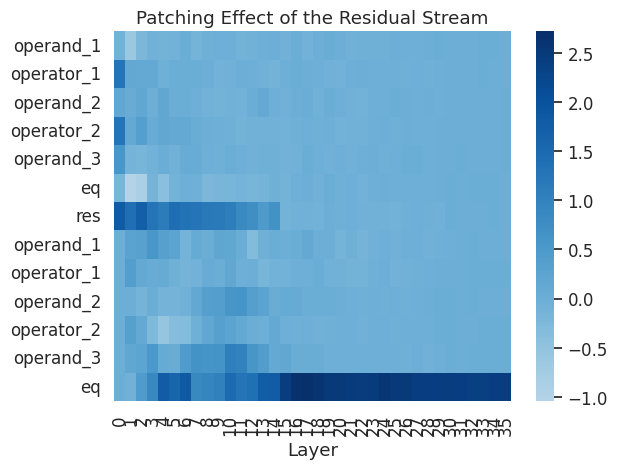

In [60]:
sns.heatmap(
        compute_pe(patched_results_operands_operators_sum, all_resid_pre_clean_logit_diffs_sum, all_resid_pre_corrupted_logit_diffs_sum).T,
        cmap='Blues',
        vmin=torch.min(compute_pe(all_resid_pre_act_patch_results_sum, all_resid_pre_clean_logit_diffs_sum, all_resid_pre_corrupted_logit_diffs_sum)),
        vmax=torch.max(compute_pe(all_resid_pre_act_patch_results_sum, all_resid_pre_clean_logit_diffs_sum, all_resid_pre_corrupted_logit_diffs_sum)),
        yticklabels=labels,
        annot=False,
        xticklabels=True,
        center=0
    )

plt.title('Patching Effect of the Residual Stream')
plt.xlabel('Layer')
plt.show()

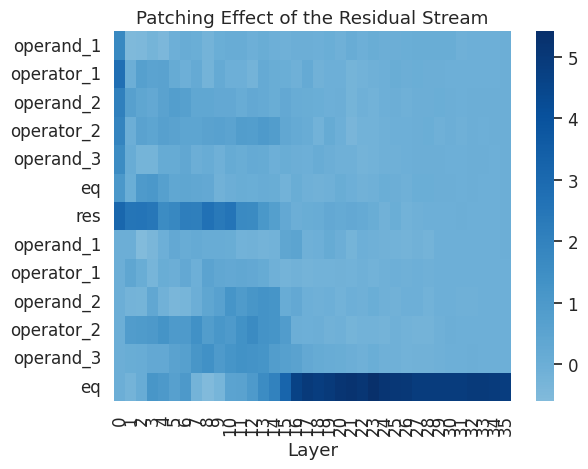

In [61]:
sns.heatmap(
        compute_pe(patched_results_operands_operators_mult, all_resid_pre_clean_logit_diffs_mult, all_resid_pre_corrupted_logit_diffs_mult).T,
        cmap='Blues',
        vmin=torch.min(compute_pe(all_resid_pre_act_patch_results_mult, all_resid_pre_clean_logit_diffs_mult, all_resid_pre_corrupted_logit_diffs_mult)),
        vmax=torch.max(compute_pe(all_resid_pre_act_patch_results_mult, all_resid_pre_clean_logit_diffs_mult, all_resid_pre_corrupted_logit_diffs_mult)),
        yticklabels=labels,
        annot=False,
        xticklabels=True,
        center=0
    )

plt.title('Patching Effect of the Residual Stream')
plt.xlabel('Layer')
plt.show()

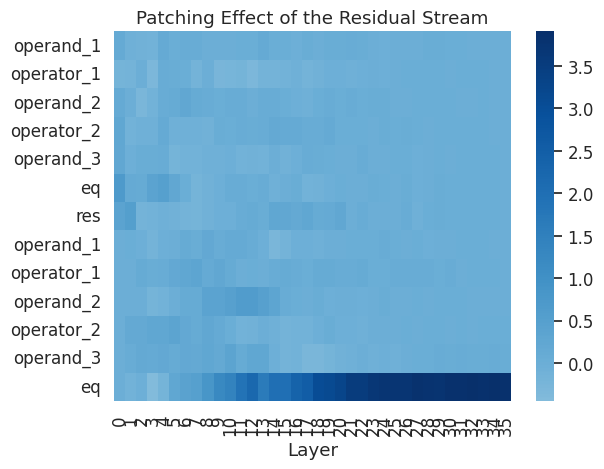

In [65]:
sns.heatmap(
        compute_pe(patched_results_operands_operators_complex, all_resid_pre_clean_logit_diffs_complex, all_resid_pre_corrupted_logit_diffs_complex).T,
        cmap='Blues',
        vmin=torch.min(compute_pe(patched_results_operands_operators_complex, all_resid_pre_clean_logit_diffs_complex, all_resid_pre_corrupted_logit_diffs_complex)),
        vmax=torch.max(compute_pe(patched_results_operands_operators_complex, all_resid_pre_clean_logit_diffs_complex, all_resid_pre_corrupted_logit_diffs_complex)),
        yticklabels=labels,
        annot=False,
        xticklabels=True,
        center=0
    )

plt.title('Patching Effect of the Residual Stream')
plt.xlabel('Layer')
plt.show()

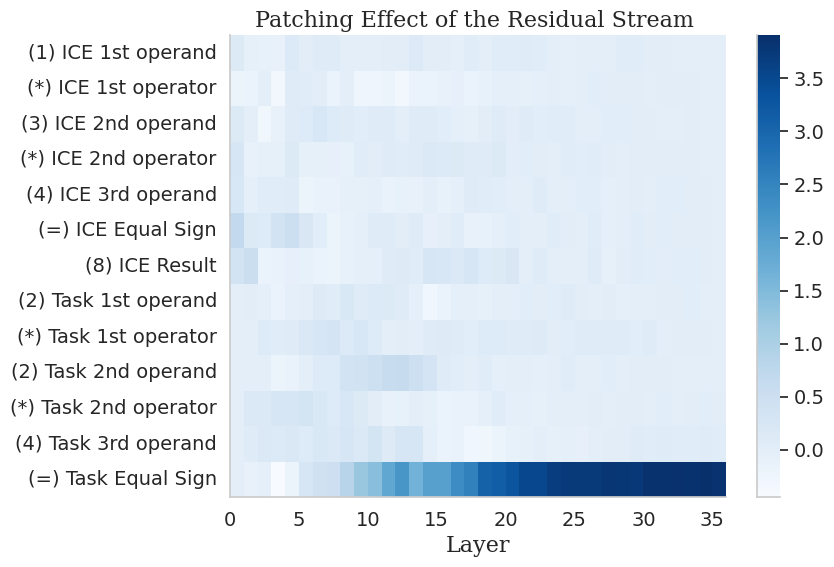

In [66]:
import pandas as pd

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Create a dataframe from the matrix
# idx = ['(1) ICE 1st operand', '(+) ICD 1st operator', '(3) ICD 2nd operand', '(+) ICD 2nd operator', '(4) ICD 3rd operand', '(=) ICD Equal Sign', '(8) ICD Result', '(2) Task 1st operand', '(+) Task 1st operator', '(2) Task 2nd operand', '(+) Task 2nd operator', '(4) Task 3rd operand', '(=) Task Equal Sign']
idx = ['(1) ICE 1st operand', '(*) ICE 1st operator', '(3) ICE 2nd operand', '(*) ICE 2nd operator', '(4) ICE 3rd operand', '(=) ICE Equal Sign', '(8) ICE Result', '(2) Task 1st operand', '(*) Task 1st operator', '(2) Task 2nd operand', '(*) Task 2nd operator', '(4) Task 3rd operand', '(=) Task Equal Sign']

# df = pd.DataFrame(compute_pe(patched_results_operands_operators_sum, all_resid_pre_clean_logit_diffs_sum, all_resid_pre_corrupted_logit_diffs_sum).T, index=idx, columns=np.arange(36))
# df = pd.DataFrame(compute_pe(patched_results_operands_operators_mult, all_resid_pre_clean_logit_diffs_mult, all_resid_pre_corrupted_logit_diffs_mult).T, index=idx, columns=np.arange(36))
df = pd.DataFrame(compute_pe(patched_results_operands_operators_complex, all_resid_pre_clean_logit_diffs_complex, all_resid_pre_corrupted_logit_diffs_complex).T, index=idx, columns=np.arange(36))

vmax=None

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)
sns.set_style("whitegrid", {'axes.grid' : False})
ax = sns.heatmap(df, cmap="Blues", annot=False, fmt=".1f", cbar=True, vmax=vmax)
# set x-axis ticks to the range of unique layers
ax.set_xticks(range(36))

# # set x-axis labels to the range of unique layers
ax.set_xticklabels(range(36), fontsize=14, rotation=0)
plt.xlabel('Layer', fontsize=16, fontname='DeJavu Serif')

for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)

# Y-axis adjustments: Make labels horizontal and remove the y-axis title
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)
plt.ylabel('') # Remove y-axis title

# Title and other adjustments
plt.title(f'Patching Effect of the Residual Stream ', fontsize=16, fontname='DeJavu Serif')

# Adjust color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)

# Remove chart junk
sns.despine()

# plt.savefig("patching_effect_residual_stream.png", format='png', bbox_inches='tight')
plt.show()

<Axes: >

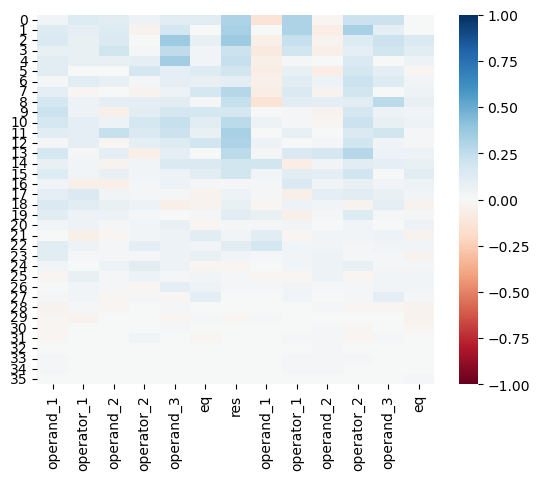

In [116]:
sns.heatmap(
        compute_macro_mean(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = labels
    )

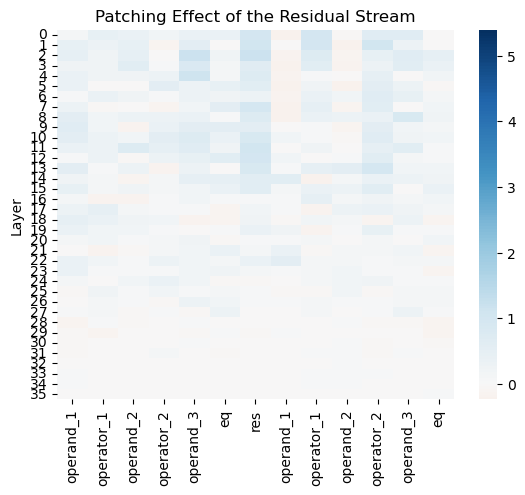

In [117]:
sns.heatmap(
        compute_pe(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-0.2340,
        vmax=5.3958,
        yticklabels=True,
        annot=False,
        xticklabels = labels,
        center=0
    )

plt.title('Patching Effect of the Residual Stream')
plt.ylabel('Layer')
plt.show()

<Axes: >

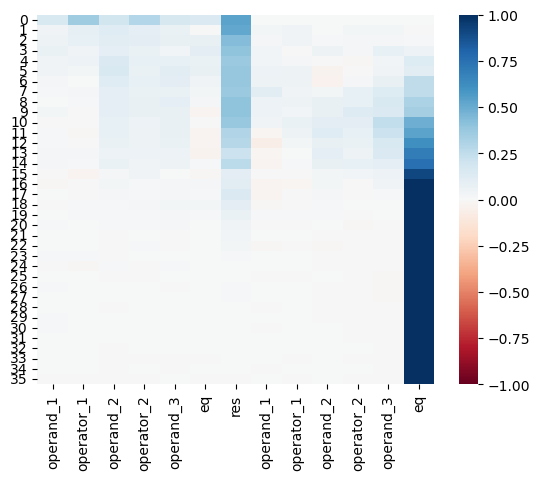

In [33]:
sns.heatmap(
        compute_micro_mean(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = labels
    )

In [34]:
torch.max(compute_pe(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs))

tensor(5.3958)

In [35]:
torch.min(compute_pe(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs))

tensor(-0.2340)

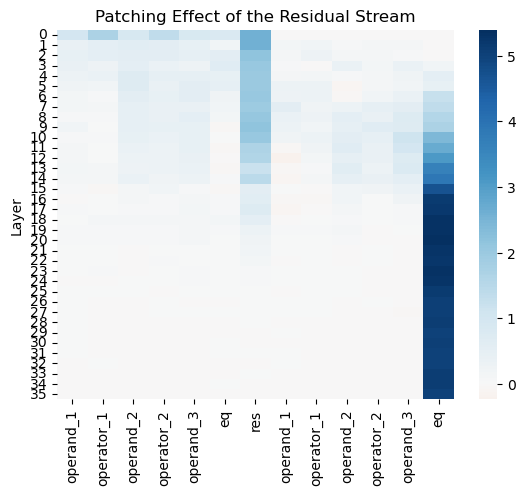

In [ ]:
sns.heatmap(
        compute_pe(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-0.2340,
        vmax=5.3958,
        yticklabels=True,
        annot=False,
        xticklabels = labels,
        center=0
    )

plt.title('Patching Effect of the Residual Stream')
plt.ylabel('Layer')
plt.show()

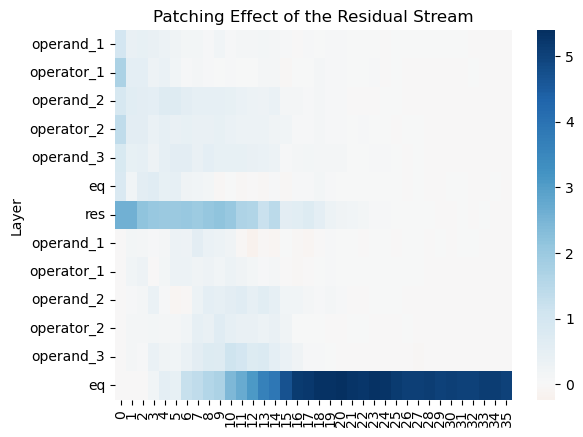

In [55]:
sns.heatmap(
        compute_pe(patched_results_operands_operators, all_resid_pre_clean_logit_diffs, all_resid_pre_corrupted_logit_diffs).T,
        cmap='RdBu',
        vmin=-0.2340,
        vmax=5.3958,
        yticklabels=labels,
        annot=False,
        xticklabels=True,
        center=0
    )

plt.title('Patching Effect of the Residual Stream')
plt.ylabel('Layer')
plt.show()

In [37]:
# attn_layer_act_patch_results = []
# attn_layer_clean_logit_diffs = []
# attn_layer_corrupted_logit_diffs = []
# for item in tqdm(corr_intervention_list):
#     patched_logit_diff, clean_logit_diff, corrupted_logit_diff = get_patched_result(item, activation_name='attn_layer')
#     attn_layer_act_patch_results.append(patched_logit_diff)
#     attn_layer_clean_logit_diffs.append(clean_logit_diff)
#     attn_layer_corrupted_logit_diffs.append(corrupted_logit_diff)

# attn_layer_patched_results_operands_operators = take_operands_and_operators_results(corr_intervention_list, attn_layer_act_patch_results)

In [38]:
# torch.save(attn_layer_act_patch_results, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/attn_layer_logit_diff_96_samples.pkl')
# torch.save(attn_layer_clean_logit_diffs, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/attn_layer_clean_logit_diff_96_samples.pkl')
# torch.save(attn_layer_corrupted_logit_diffs, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/attn_layer_corrupted_logit_diff_96_samples.pkl')

In [39]:
attn_layer_act_patch_results = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/attn_layer_logit_diff_96_samples.pkl')
attn_layer_clean_logit_diffs = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/attn_layer_clean_logit_diff_96_samples.pkl')
attn_layer_corrupted_logit_diffs = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/attn_layer_corrupted_logit_diff_96_samples.pkl')

/tmp/ipykernel_4067906/2055145764.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  attn_layer_act_patch_results = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/d

In [40]:
attn_layer_patched_results_operands_operators = take_operands_and_operators_results(corr_intervention_list, attn_layer_act_patch_results)

<Axes: >

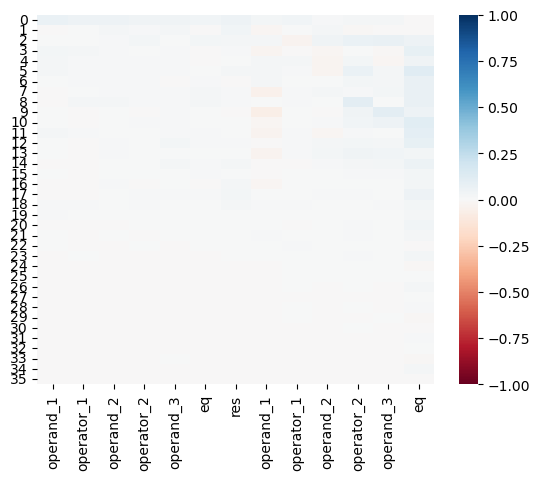

In [41]:
sns.heatmap(
        compute_macro_mean(attn_layer_patched_results_operands_operators, attn_layer_clean_logit_diffs, attn_layer_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = labels
    )

<Axes: >

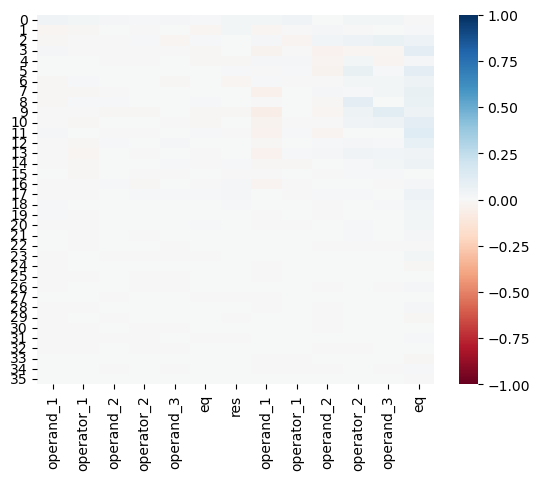

In [42]:
sns.heatmap(
        compute_micro_mean(attn_layer_patched_results_operands_operators, attn_layer_clean_logit_diffs, attn_layer_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = labels
    )

In [43]:
torch.min(compute_pe(attn_layer_patched_results_operands_operators, attn_layer_clean_logit_diffs, attn_layer_corrupted_logit_diffs))

tensor(-0.3092)

In [44]:
torch.max(compute_pe(attn_layer_patched_results_operands_operators, attn_layer_clean_logit_diffs, attn_layer_corrupted_logit_diffs))

tensor(0.6315)

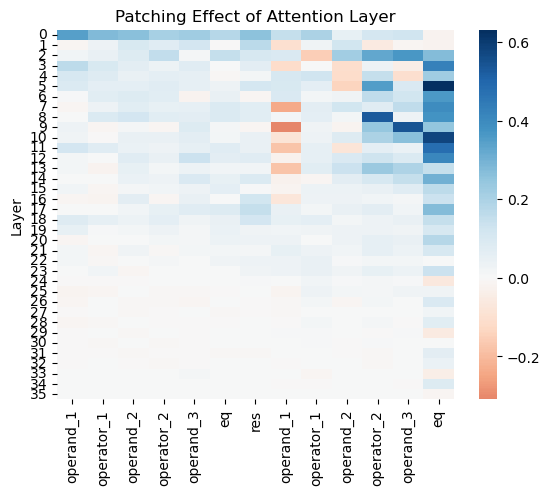

In [33]:
sns.heatmap(
    compute_pe(attn_layer_patched_results_operands_operators, attn_layer_clean_logit_diffs, attn_layer_corrupted_logit_diffs),
    cmap='RdBu',
    yticklabels=True,
    annot=False,
    xticklabels = labels,
    vmin=-0.3092,
    vmax=0.6315,
    center=0
)

plt.title('Patching Effect of Attention Layer')
plt.ylabel('Layer')
plt.show()

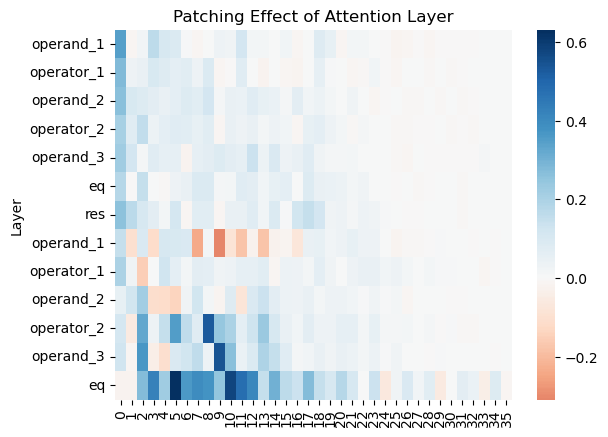

In [45]:
sns.heatmap(
    compute_pe(attn_layer_patched_results_operands_operators, attn_layer_clean_logit_diffs, attn_layer_corrupted_logit_diffs).T,
    cmap='RdBu',
    yticklabels=labels,
    annot=False,
    xticklabels=True,
    vmin=-0.3092,
    vmax=0.6315,
    center=0
)

plt.title('Patching Effect of Attention Layer')
plt.ylabel('Layer')
plt.show()

In [46]:
# mlp_act_patch_results = []
# mlp_clean_logit_diffs = []
# mlp_corrupted_logit_diffs = []
# for item in tqdm(corr_intervention_list):
#     patched_logit_diff, clean_logit_diff, corrupted_logit_diff = get_patched_result(item, activation_name='mlp')
#     mlp_act_patch_results.append(patched_logit_diff)
#     mlp_clean_logit_diffs.append(clean_logit_diff)
#     mlp_corrupted_logit_diffs.append(corrupted_logit_diff)

In [47]:
mlp_act_patch_results = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/mlp_logit_diff_96_samples.pkl')
mlp_clean_logit_diffs = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/mlp_clean_logit_diff_96_samples.pkl')
mlp_corrupted_logit_diffs = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/mlp_corrupted_logit_diff_96_samples.pkl')

/tmp/ipykernel_4067906/111999855.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mlp_act_patch_results = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patc

In [48]:
mlp_patched_results_operands_operators = take_operands_and_operators_results(corr_intervention_list, mlp_act_patch_results)

<Axes: >

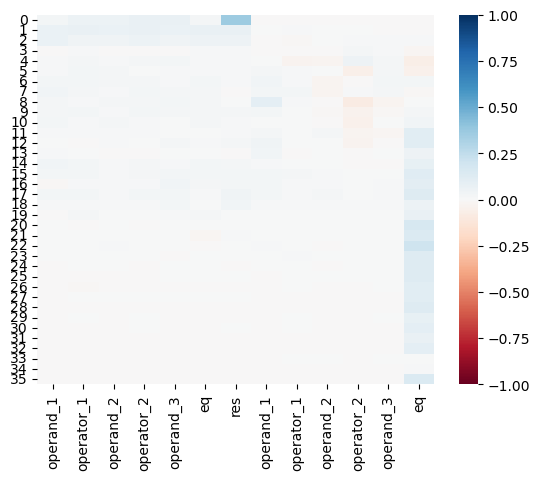

In [49]:
sns.heatmap(
        compute_macro_mean(mlp_patched_results_operands_operators, mlp_clean_logit_diffs, mlp_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = labels
    )

<Axes: >

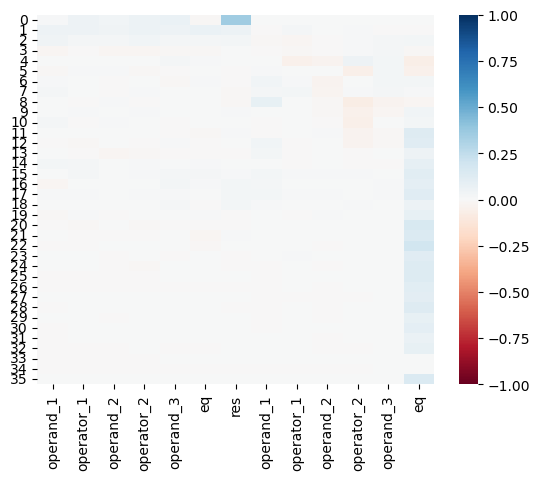

In [50]:
sns.heatmap(
        compute_micro_mean(mlp_patched_results_operands_operators, mlp_clean_logit_diffs, mlp_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = labels
    )

In [51]:
torch.min(compute_pe(mlp_patched_results_operands_operators, mlp_clean_logit_diffs, mlp_corrupted_logit_diffs))

tensor(-0.4089)

In [52]:
torch.max(compute_pe(mlp_patched_results_operands_operators, mlp_clean_logit_diffs, mlp_corrupted_logit_diffs))

tensor(1.8398)

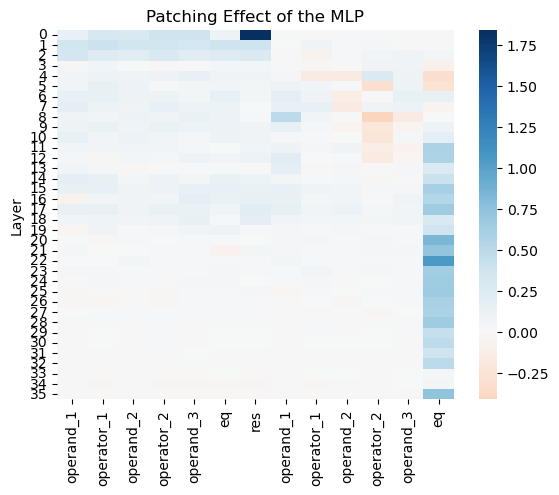

In [ ]:
sns.heatmap(
        compute_pe(mlp_patched_results_operands_operators, mlp_clean_logit_diffs, mlp_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-0.4089,
        vmax=1.8398,
        center=0,
        yticklabels=True,
        annot=False,
        xticklabels = labels
    )

plt.title('Patching Effect of the MLP')
plt.ylabel('Layer')
plt.show()

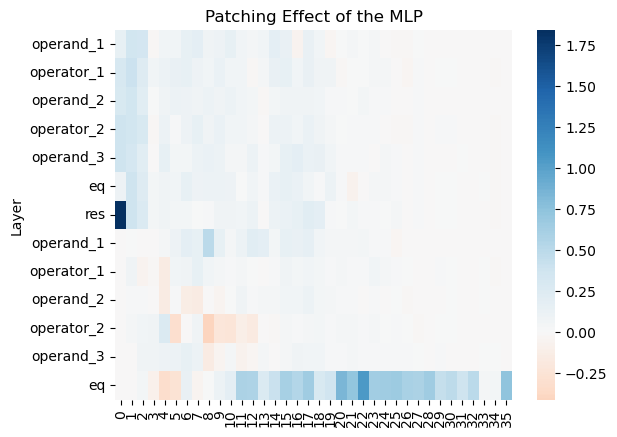

In [53]:
sns.heatmap(
        compute_pe(mlp_patched_results_operands_operators, mlp_clean_logit_diffs, mlp_corrupted_logit_diffs).T,
        cmap='RdBu',
        vmin=-0.4089,
        vmax=1.8398,
        center=0,
        yticklabels=labels,
        annot=False,
        xticklabels=True
    )

plt.title('Patching Effect of the MLP')
plt.ylabel('Layer')
plt.show()

Let's patch attention heads

In [77]:
# head_patch_results = []
# head_clean_logit_diffs = []
# head_corrupted_logit_diffs = []
# for item in tqdm(corr_intervention_list):
#     patched_logit_diff, clean_logit_diff, corrupted_logit_diff = get_patched_result(item, activation_name='head')
#     head_patch_results.append(patched_logit_diff)
#     head_clean_logit_diffs.append(clean_logit_diff)
#     head_corrupted_logit_diffs.append(corrupted_logit_diff)

In [78]:
# torch.save(head_patch_results, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/head_patch_logit_diff_96_samples.pkl')
# torch.save(head_clean_logit_diffs, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/head_clean_logit_diff_96_samples.pkl')
# torch.save(head_corrupted_logit_diffs, '/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/head_clean_corrupted_diff_96_samples.pkl')

In [79]:
head_patch_results = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/head_patch_logit_diff_96_samples.pkl')
head_clean_logit_diffs = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/head_clean_logit_diff_96_samples.pkl')
head_corrupted_logit_diffs = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patching_results_pythia_12b/head_clean_corrupted_diff_96_samples.pkl')

/tmp/ipykernel_1393605/2746894999.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  head_patch_results = torch.load('/mnt/qb/work/eickhoff/esx208/arithmetic-lm/data/patchi

<Axes: >

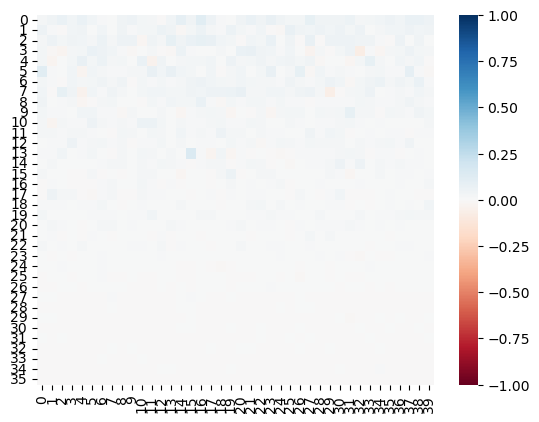

In [80]:
sns.heatmap(
        compute_macro_mean(head_patch_results, head_clean_logit_diffs, head_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = True
    )

<Axes: >

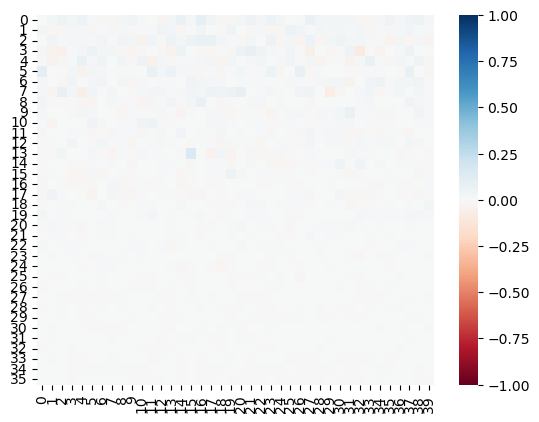

In [81]:
sns.heatmap(
        compute_micro_mean(head_patch_results, head_clean_logit_diffs, head_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-1,
        vmax=1,
        yticklabels=True,
        annot=False,
        xticklabels = True
    )

In [82]:
torch.min(compute_pe(head_patch_results, head_clean_logit_diffs, head_corrupted_logit_diffs))

tensor(-0.3835)

In [83]:
torch.max(compute_pe(head_patch_results, head_clean_logit_diffs, head_corrupted_logit_diffs))

tensor(0.7194)

<Axes: >

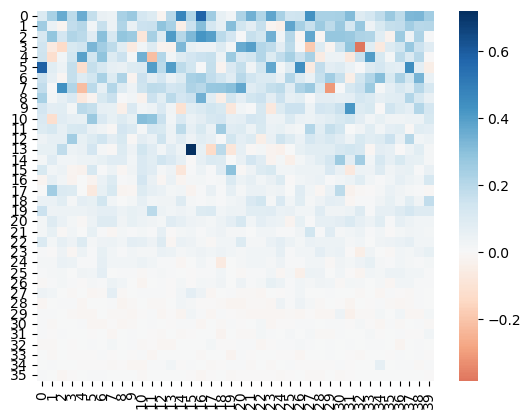

In [85]:
sns.heatmap(
        compute_pe(head_patch_results, head_clean_logit_diffs, head_corrupted_logit_diffs),
        cmap='RdBu',
        vmin=-0.3835,
        vmax=0.7194,
        center=0,
        yticklabels=True,
        annot=False,
        xticklabels = True
    )